# **Convolutional Neural Networks**

# Given

In [ ]:
# loading the necessary libraries
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime, os

def plot_samples(x_train, y_train):
    ''' 
    This function takes a set of data samples and their labels as input and plots 10 samples for each class label.
    '''
    y_train = np.squeeze(y_train)
    fig, axes = plt.subplots(10, 11, frameon=False, figsize=(20, 16))  # Initializes the figure with 110 suplots
    fig.subplots_adjust(hspace = .05, wspace=.001)  # Adjusts the spacing between the plots
    classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  # The names of the 10 classes
    for i in range(len(classes)):  # Loop over the number of classes
        axes[i,0].text(0,0.5,str(i)+' : '+classes[i], fontsize=15)  # Writes the class labels in the first column of subplots 
        axes[i,0].get_xaxis().set_visible(False)  # Removes the x-axis from the plot
        axes[i,0].get_yaxis().set_visible(False)  # Removes the y-axis from the plot
        axes[i,0].set_frame_on(False)  # Makes the Background of the plot transparent

        class_idxs = np.squeeze(np.where(y_train==i))  # Finds every index corresponding to the current class
        idxs = np.random.choice(class_idxs,10)  # Picks ten random indices to plot random class examples
        for j in range(10):  # Loop over the number of samples we want to plot
            axes[i,j+1].imshow(x_train[idxs[j]])  # Plots the sample Image in graysclae
            axes[i,j+1].get_xaxis().set_visible(False)  # Removes the x-axis from the plot
            axes[i,j+1].get_yaxis().set_visible(False)  # Removes the y-axis from the plot
    fig.savefig('training_examples.png', bbox_inches='tight')  # Saves the figure

def load_cifar10():
    '''
    Downloads the fashion mnist dataset and returns it.
    '''
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    return (x_train, y_train), (x_test, y_test)

# Exercise 1: Preparing the Data (1 Points)

Load the cifar10 dataset (you can use the provided function from the first code cell) and print the shape of the data and labels, both for training and test data.

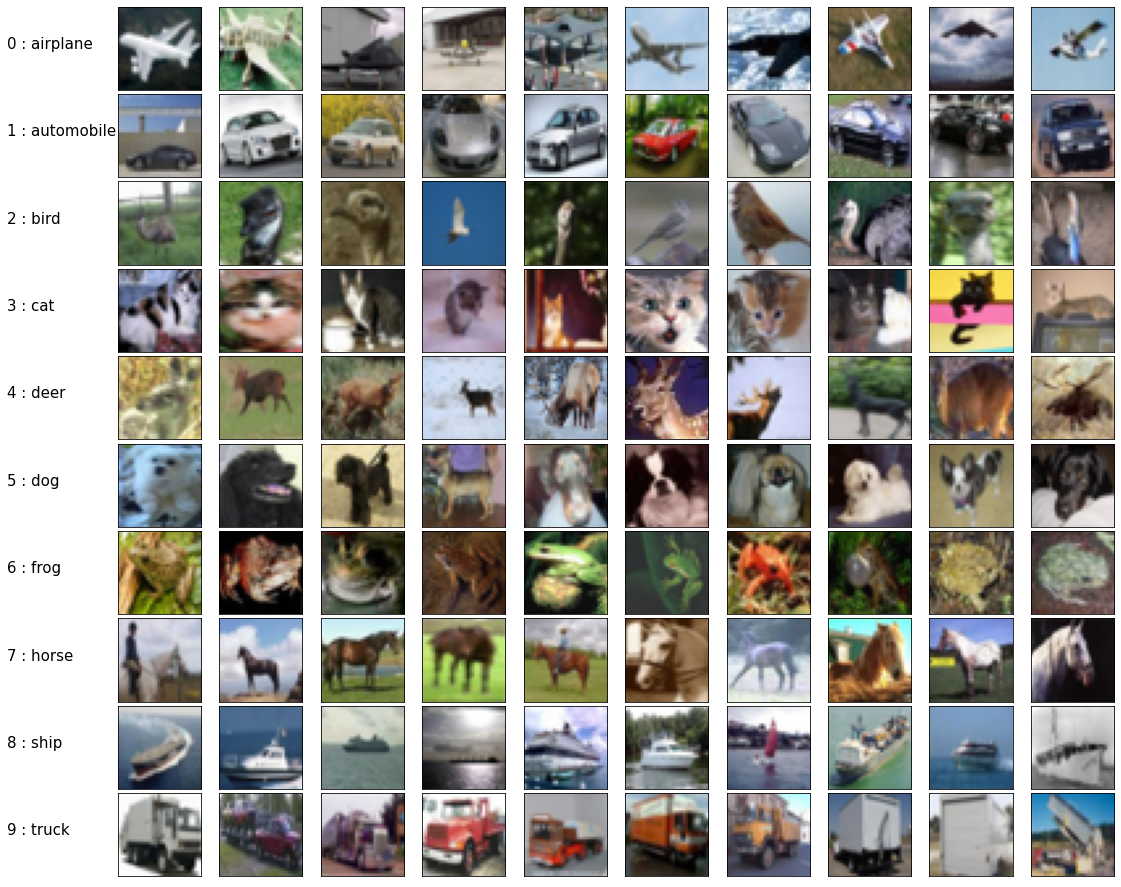

In [ ]:
from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
plot_samples(train_images , train_labels)

Normalize the data by scaling it to unit range.

Hint: The dataset contains 8bit PNG images

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

Take a look into the dataset by using the provided "plot_samples" function.

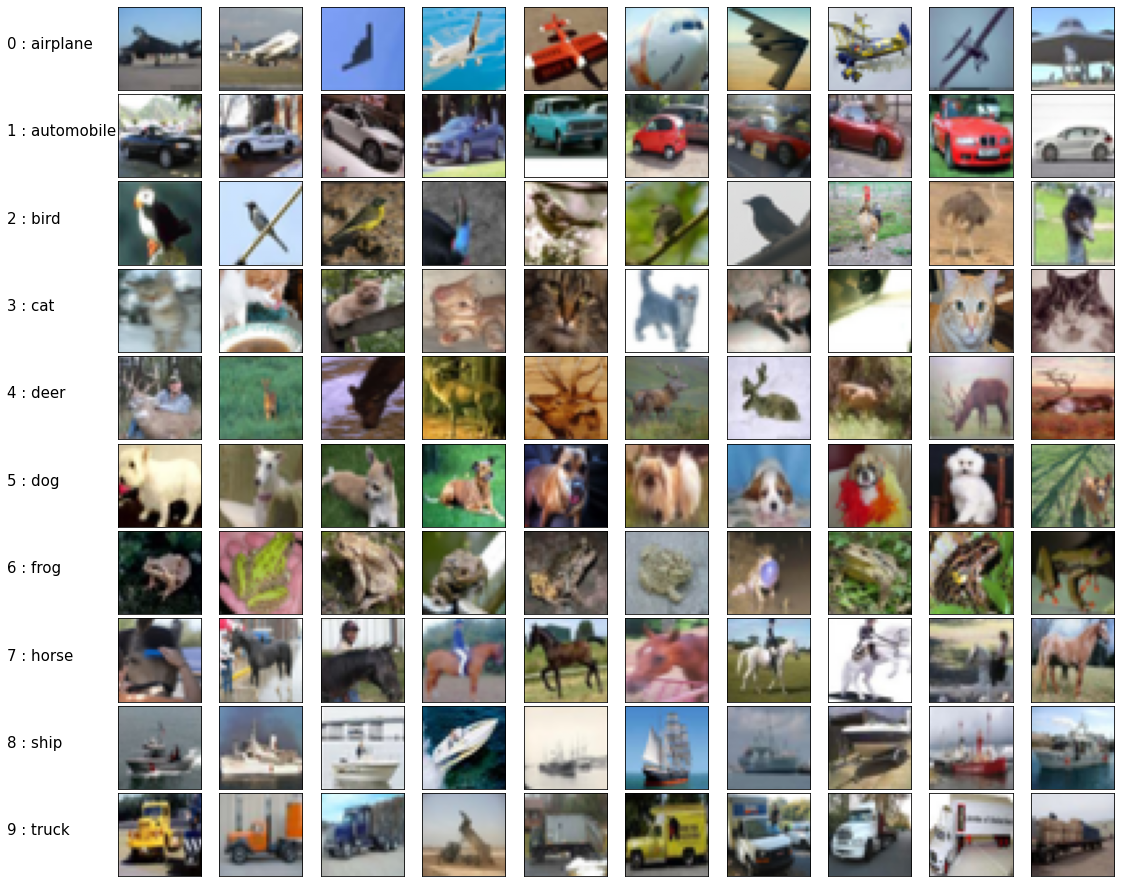

In [ ]:
plot_samples(train_images , train_labels)

# Exercise 2: Build a classical convolutional neural network (4 Points) 

Build the depicted convolutional neural network with the Sequential or Functional API.

![](https://drive.google.com/uc?export=view&id=1yiwNKyGX3tHPvIKpsadYcV-7y6mIj9gS)

Use the Adam optimizer with default values for every hyperparameters. Incorporate a validation dataset and include the accuracy as metric. Train the network for 100 epochs towards the sparse categorical crossentropy as loss function and then evaluate it on the test data.

If you are uncertain about the syntax of the Keras layers, take a look at the respective documentation for [max pooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) and [convolutions](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D).

In [ ]:
temp_model = models.Sequential()
temp_model.add(layers.Conv2D(16 ,(3,3),strides=(1,1),padding="same",activation='relu'))
temp_model.add(layers.MaxPooling2D((2, 2),strides=2))
temp_model.add(layers.Conv2D(32, (3, 3),strides=(1,1),padding="same", activation='relu'))
temp_model.add(layers.MaxPooling2D((2, 2),strides=2))
temp_model.add(layers.Conv2D(64, (3, 3),strides=(1,1),padding="same", activation='relu'))
temp_model.add(layers.MaxPooling2D((2, 2),strides=2))
temp_model.add(layers.Flatten())
temp_model.add(layers.Dense(256, activation='relu'))
temp_model.add(layers.Dense(256, activation='relu'))
temp_model.add(layers.Dense(10, activation='softmax'))
temp_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = temp_model.fit(train_images, train_labels, epochs=100, 
                    validation_data=(test_images, test_labels))
temp_model.summary()


Epoch 1/100
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0980 - accuracy: 0.3524 - val_loss: 2.0197 - val_accuracy: 0.4345
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9804 - accuracy: 0.4751 - val_loss: 1.9342 - val_accuracy: 0.5234
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9187 - accuracy: 0.5393 - val_loss: 1.8908 - val_accuracy: 0.5661
Epoch 4/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8866 - accuracy: 0.5718 - val_loss: 1.8710 - val_accuracy: 0.5867
Epoch 5/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8603 - accuracy: 0.5980 - val_loss: 1.8607 - val_accuracy: 0.5988
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8446 - accuracy: 0.6143 - val_loss: 1.8611 - val_accuracy: 0.5974
Epoch 7/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8310 - accuracy: 0.6281 - val_loss: 1.8685 - val_ac

# Exercise 3: Analyze the Results (16 Points)

Now first visualize the training progress. **(1 Point)**

You can do this by saving the loss and metrics to a history object and plot them with matplotlib. (history = model.fit(...))

For questions on how to use matplotlib, refer to the example plotting functions in this or the previous exercise sheets, or see the [documentation](https://matplotlib.org/).

In [ ]:
print(history.history.keys())
fig , axes = plt.subplots(1 , 4 , figsize=(25,4))
for i , key in enumerate(history.history.keys()):
  axes[i].plot(range(len(history.history[key])),history.history[key],label=key)
  axes[i].legend()

NameError: ignored

Explain what you see **(1 Point)**

I think after certain no of epoch , training loss has increased and accuracy has started to go down.

Next plot the Kernel weights for every Kernel of the first convolutional layer. **(4 Points)**

In order to plot the Kernels of the model in its best state, with regard to the validation accuracy, you should insert the following callback in your training procedure. So reinitialize the model, compile it and re-train it with the callback for 100 epochs.  

The callback monitors the validation accuracy and saves the model weights for the state with best validation accuracy.

In [ ]:
best_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="best_weights.h5", 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True)

In [ ]:
#model.fit(epochs=EPOCHS, callbacks=[model_checkpoint_callback])

# The model weights (that are considered the best) are loaded into the model.
#model.load_weights(checkpoint_filepath)
%load_ext tensorboard
model = models.Sequential()
model.add(layers.Conv2D(16 ,(3,3),strides=(1,1),padding="same",activation='relu'))
model.add(layers.MaxPooling2D((2, 2),strides=2))
model.add(layers.Conv2D(32, (3, 3),strides=(1,1),padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2),strides=2))
model.add(layers.Conv2D(64, (3, 3),strides=(1,1),padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2),strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(train_images, train_labels, epochs=100, 
                    validation_data=(test_images, test_labels),callbacks=[best_checkpoint , tensorboard_callback])

model.summary()



Epoch 1/100
   1/1563 [..............................] - ETA: 1s - loss: 2.3019 - accuracy: 0.1250WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1563/1563 [==============================] - ETA: 0s - loss: 2.0934 - accuracy: 0.3570
Epoch 00001: val_accuracy improved from -inf to 0.46120, saving model to best_weights.h5
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0934 - accuracy: 0.3570 - val_loss: 1.9988 - val_accuracy: 0.4612
Epoch 2/100
1559/1563 [============================>.] - ETA: 0s - loss: 1.9776 - accuracy: 0.4797
Epoch 00002: val_accuracy improved from 0.46120 to 0.50130, saving model to best_weights.h5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9775 - accuracy: 0.4797 - val_loss: 1.9538 - val_accuracy

Now reload the saved weights of the 'best' model state into your model and get an array of the weights of the first convolution layer. **(2 Points)**

Hint: The returned object of the method call 'get_weights' on a single layer is a list [w, b] containing the weights and biases of that layer. You only need the former. The weight array itself has dimensions (Kernel_Width, Kernel_Height, Input_Channels, Output_Channels), i.e. in our case (3, 3, 3, 16) for the first layer.

In [ ]:
import numpy 
model.load_weights("best_weights.h5")
filters, biases = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min) 
print(numpy.array(filters).shape[3])
print(filters)   

16
[[[[0.9063077  0.49300689 0.42237088 0.5111098  0.5268446  0.44218
    0.5865875  0.63395756 0.32430202 0.38202387 0.45282063 0.76818013
    0.4363711  0.7707101  0.36367202 0.1701431 ]
   [0.5298216  0.42516387 0.4132913  0.15593769 0.65147483 0.35061815
    0.5323269  0.48954225 0.19514263 0.24434663 0.42626193 0.8557106
    0.26425517 0.5713553  0.4940338  0.13772658]
   [0.32632712 0.7237866  0.50193876 0.12072313 0.2343588  0.47854692
    0.2812977  0.66553867 0.6244384  0.44265723 0.5911633  0.9645169
    0.31969872 0.5595843  0.11728005 0.43722993]]

  [[0.71823204 0.5539783  0.1586822  0.38144398 0.65843266 0.768268
    0.59721935 0.7839004  0.1711619  0.47299817 0.45296192 0.63248706
    0.6269808  0.5423147  0.5391125  0.18476662]
   [0.22695269 0.6765523  0.34473628 0.2861733  0.5296963  0.58114874
    0.7812429  0.6798703  0.6190487  0.5242261  0.40733796 0.60516346
    0.28030756 0.74022037 0.5073461  0.5297483 ]
   [0.5248268  0.7491926  0.38116494 0.45830718 0.4508124

Now use the weights you got and plot all kernels of the first layer in one figure. **(4 Points)**

For this you have to normalize the weight values to the range [0, 1] 

Hint: if you want to plot an RGB image with matplotlibs 'imshow' method, you have to pass a 3 dimensional array with shape (height, width, 3). To get that shape out of 3 2D numpy arrays a,b and c you can use: np.stack((a,b,c), axis=-1)

It is also possible to specify the colormap (cmap) of the imshow method, e.g. 'Greys', 'Reds', 'Greens' or 'Blues'






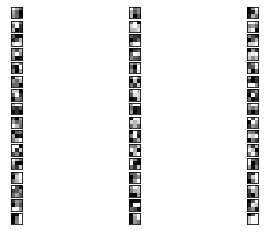

In [ ]:
import numpy
n_filters, ix = numpy.array(filters).shape[3] , 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]

	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
    
# show the figure
plt.show()

Explain what you can deduce from these plots in 1-3 lines. **(1 Point)**

Every filter is focusing on different - different sub area of the input image, leading to different - different feature map for each subarea 


Now plot the activations after the first and the last convolution layer **(2 Points)**

For this you can use the code written below.

In [ ]:
layer_outputs = [layer.output for layer in model.layers] # you may need to change model to the name of your model

activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs) # you may need to change model to the name of your model

The activation Model takes the same input as the original model, i.e. one or more RGB images, and returns a list of the activations of every layer for every input image. Use it to predict the outputs for one image of the test dataset and plot the activations of the first and the last convolution in one figure each.

For a meaningful evaluation you should also plot the original image.

Hint: Even for only one image the input to the model must be 4 dimensional (Batchsize = 1). So you will need to expand the coresponding dimension.

(1, 32, 32, 3)
16
(8, 8, 64)


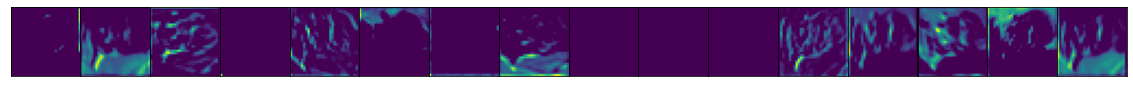

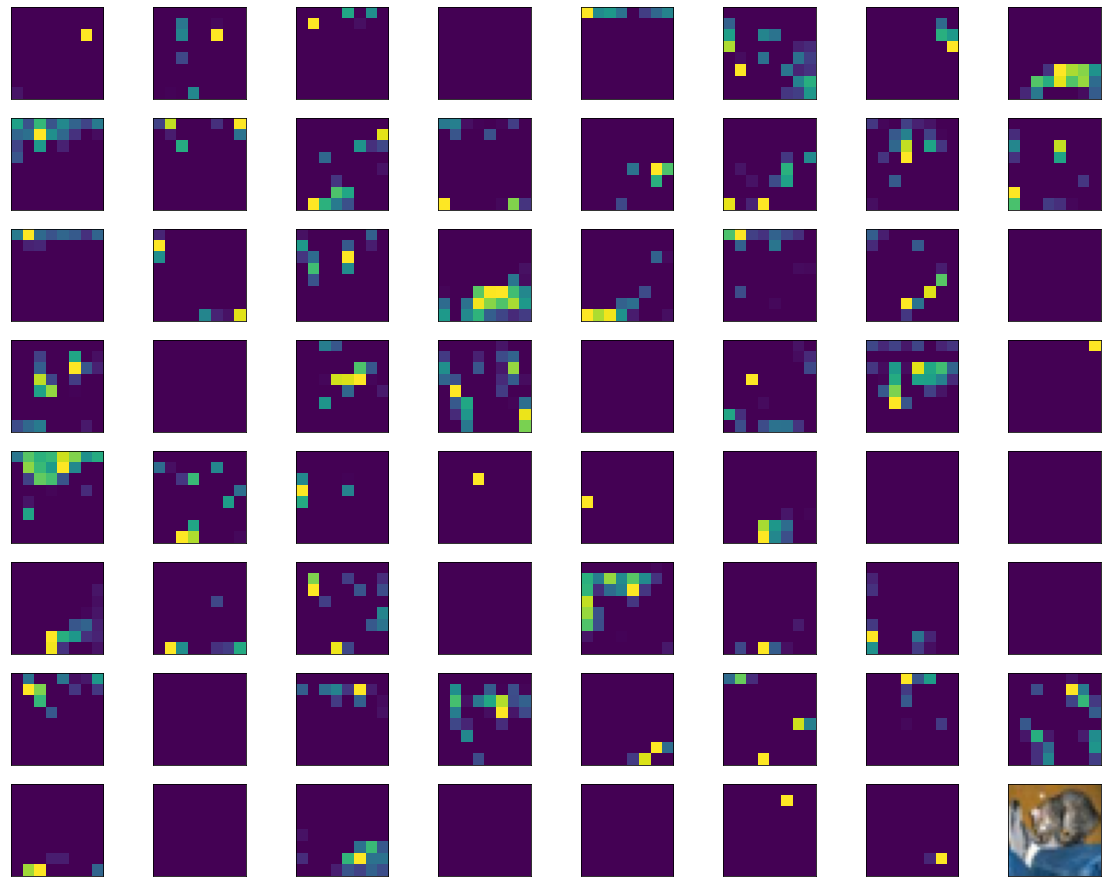

In [ ]:
Test_Arr =numpy.array([ test_images[0,:,:,:]])
print(Test_Arr.shape)
output = activation_model.predict(Test_Arr,batch_size= 1)

first_layer_output = output[0][0]
last_layer_output = output[4][0]
print(numpy.array(first_layer_output).shape[2])
print(numpy.array(last_layer_output).shape)

fig, axes = plt.subplots(1, first_layer_output.shape[2], frameon=False, figsize=(20, 16))  # Initializes the figure with 110 suplots
fig.subplots_adjust(hspace = .05, wspace=.001)  # Adjusts the spacing between the plots

for j in range (first_layer_output.shape[2]):
   axes[j].imshow(first_layer_output[:,:,j])
   axes[j].get_xaxis().set_visible(False)
   axes[j].get_yaxis().set_visible(False)
  
#no_rows = last_layer_output.shape[2]/8
#no_columns =  last_layer_output.shape[2]/8
fig_last_layer, axes_last_layer = plt.subplots(8, 8, frameon=False, figsize=(20, 16))  # Initializes the figure with 110 suplots
fig.subplots_adjust(hspace = .05, wspace=.001)  # Adjusts the spacing between the plots

for i in range (8):
   for j in range (8):
      axes_last_layer[i , j].imshow(last_layer_output[:,:,i*8+j])
      axes_last_layer[i , j].get_xaxis().set_visible(False)
      axes_last_layer[i , j].get_yaxis().set_visible(False)

plt.imshow(Test_Arr[0])



Explain what you can deduce from the visualization of the activations. **(1 Point)**

First layer output is focusing on edge and surface detection. It looks like last layer is more on generalised feature such locating a perticuler type of shape such as cat and other object


# Exercise 4: Advancing the network (8 Points)

Explain qualitatively what is different if you change the pooling layers to convolutions with a Kernelsize of 3 and a stride of 2 or 3, and what effect this might have on the model accuracy. **(2 Points)**

I think feature maps are very sesitive to position of features, Hence pooling is done where we lower down resolution so that each patch covers the most important feature without much precise details.I think if we replace pooling by convolution layer then model will be more sensitive towards feature position and may predict wrongly for some of input images

Now change the convolutional network to incorporate a strided convolution instead of each pooling layer, keeping the shape of the outputs the same and plot the evolution of the loss and accuracy again. **(2 Points)**

In [ ]:
best_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="best_weights_FullConv.h5", 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True)

model_FullConv = models.Sequential()
model_FullConv.add(layers.Conv2D(16 ,(3,3),strides=(1,1),padding="same",activation='relu'))
model_FullConv.add(layers.Conv2D(16 ,(3,3),strides=(2,2),padding="same",activation='relu'))
model_FullConv.add(layers.Conv2D(32, (3, 3),strides=(1,1),padding="same", activation='relu'))
model_FullConv.add(layers.Conv2D(32 ,(3,3),strides=(2,2),padding="same",activation='relu'))
model_FullConv.add(layers.Conv2D(64, (3, 3),strides=(1,1),padding="same", activation='relu'))
model_FullConv.add(layers.Conv2D(64 ,(3,3),strides=(2,2),padding="same",activation='relu'))
model_FullConv.add(layers.Flatten())
model_FullConv.add(layers.Dense(256, activation='relu'))
model_FullConv.add(layers.Dense(256, activation='relu'))
model_FullConv.add(layers.Dense(10, activation='softmax'))
model_FullConv.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model_FullConv.fit(train_images, train_labels, epochs=100, 
                    validation_data=(test_images, test_labels),callbacks=[best_checkpoint])

model_FullConv.summary()

Epoch 1/100
1563/1563 [==============================] - ETA: 0s - loss: 2.1567 - accuracy: 0.2931
Epoch 00001: val_accuracy improved from -inf to 0.38480, saving model to best_weights_FullConv.h5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.1567 - accuracy: 0.2931 - val_loss: 2.0686 - val_accuracy: 0.3848
Epoch 2/100
1554/1563 [============================>.] - ETA: 0s - loss: 2.0801 - accuracy: 0.3747
Epoch 00002: val_accuracy did not improve from 0.38480
1563/1563 [==============================] - 7s 5ms/step - loss: 2.0798 - accuracy: 0.3751 - val_loss: 2.0798 - val_accuracy: 0.3741
Epoch 3/100
1559/1563 [============================>.] - ETA: 0s - loss: 2.0650 - accuracy: 0.3914
Epoch 00003: val_accuracy improved from 0.38480 to 0.38960, saving model to best_weights_FullConv.h5
1563/1563 [==============================] - 7s 5ms/step - loss: 2.0652 - accuracy: 0.3912 - val_loss: 2.0681 - val_accuracy: 0.3896
Epoch 4/100
1552/1563 [===========================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


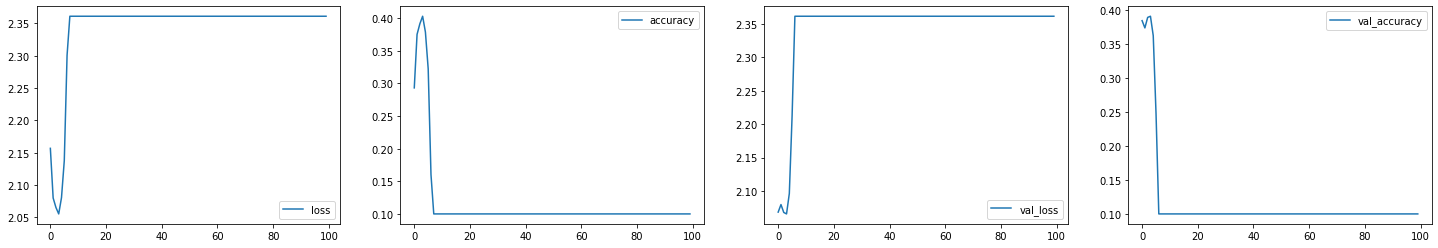

In [ ]:
print(history.history.keys())
fig , axes = plt.subplots(1 , 4 , figsize=(25,4))
for i , key in enumerate(history.history.keys()):
  axes[i].plot(range(len(history.history[key])),history.history[key],label=key)
  axes[i].legend()

Compare the best achieved accuracy on the validation set to the one achieved before as well the the respectie evolution of the losses and the accuracies. Explain what happened. **(1 Point)** 

I the corresponding model has the best accuracy of 0.39130 and the previous model with the pooling layers has the best accuracy of 
0.63180. I think since in this model we are not performing pooling on any kind of feature map. Because of this model becomes very sensitive to position of features and  hence accuracy has gone down.




```



Now also incorporate Dropout in the model. You should decide for yourself at which places to put the Dropout layers and justify your decisions. **(3 Points)**

In [ ]:
best_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="best_weights_FullConv.h5", 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True)

model_FullConv_DropOut = models.Sequential()
model_FullConv_DropOut.add(layers.Conv2D(16 ,(3,3),strides=(1,1),padding="same",activation='relu'))
model_FullConv_DropOut.add(layers.Conv2D(16 ,(3,3),strides=(2,2),padding="same",activation='relu'))
model_FullConv_DropOut.add(layers.Conv2D(32, (3, 3),strides=(1,1),padding="same", activation='relu'))
model_FullConv_DropOut.add(layers.Conv2D(32 ,(3,3),strides=(2,2),padding="same",activation='relu'))
model_FullConv_DropOut.add(layers.Conv2D(64, (3, 3),strides=(1,1),padding="same", activation='relu'))
model_FullConv_DropOut.add(layers.Conv2D(64 ,(3,3),strides=(2,2),padding="same",activation='relu'))
model_FullConv_DropOut.add(layers.Flatten())
model_FullConv_DropOut.add(layers.Dense(256, activation='relu'))
model_FullConv_DropOut.add(layers.Dropout(0.4))
model_FullConv_DropOut.add(layers.Dense(256, activation='relu'))
model_FullConv_DropOut.add(layers.Dropout(0.4))
model_FullConv_DropOut.add(layers.Dense(10, activation='softmax'))
model_FullConv_DropOut.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model_FullConv_DropOut.fit(train_images, train_labels, epochs=100, 
                    validation_data=(test_images, test_labels),callbacks=[best_checkpoint])

model_FullConv_DropOut.summary()

Epoch 1/100
1555/1563 [============================>.] - ETA: 0s - loss: 2.2391 - accuracy: 0.2121
Epoch 00001: val_accuracy improved from -inf to 0.10000, saving model to best_weights_FullConv.h5
1563/1563 [==============================] - 7s 5ms/step - loss: 2.2397 - accuracy: 0.2116 - val_loss: 2.3611 - val_accuracy: 0.1000
Epoch 2/100
1560/1563 [============================>.] - ETA: 0s - loss: 2.3610 - accuracy: 0.1002
Epoch 00002: val_accuracy did not improve from 0.10000
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3610 - accuracy: 0.1002 - val_loss: 2.3611 - val_accuracy: 0.1000
Epoch 3/100
1561/1563 [============================>.] - ETA: 0s - loss: 2.3612 - accuracy: 0.1000
Epoch 00003: val_accuracy did not improve from 0.10000
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3612 - accuracy: 0.1000 - val_loss: 2.3611 - val_accuracy: 0.1000
Epoch 4/100
1560/1563 [============================>.] - ETA: 0s - loss: 2.3611 - accuracy: 0.10

In [ ]:
I think we should put drop out layer inly before MLP Layer not before conv. layer because 
in convolutional layer when we slide the filter over the width and height of the
input image we produce a 2-dimensional activation map that gives the responses of that filter at every spatial position. 
So as dropout layer neutralizes (makes it zero) random neurons there are chances of loosing 
very important feature in an image in our training process.